# Ford_gobike-trip Data Exploration
## by Olamilekan Omotosho

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was recorded in February 2019 with 183412 records and 16 features. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading data
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#top 5 rows
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#data row and column
bike.shape

(183412, 16)

In [5]:
#data types
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
#convert columns to the right datatype
datetime_cols = ['start_time', 'end_time']
id_cols = ['start_station_id', 'end_station_id', 'bike_id']

for col in datetime_cols:
    bike[col] = pd.to_datetime(bike[col])
    
for col in id_cols:
    bike[col] = bike[col].astype(str)
    
# bike['member_birth_year'] = bike['member_birth_year'].astype(int)
    
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Extract Start Time Day Period and Hour

In [7]:
#duration in hour
bike['hour'] = bike.start_time.dt.hour

#function to extract period
def period(x):
    if (x >= 4) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x < 17):
        return 'Afternoon'
    elif (x >= 17) and (x <= 21):
        return 'Evening'
    else:
        return 'Night'

#extract the day period
#Morning, Afternoon, Evening and Night

bike['day_period'] = bike.hour.apply(period)

In [8]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day_period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Night


### Extract User Age

In [9]:
#get the user age from the present year(2022)
bike['age'] = 2022 - bike['member_birth_year']

In [10]:
bike['age']

0         38.0
1          NaN
2         50.0
3         33.0
4         48.0
          ... 
183407    26.0
183408    38.0
183409    32.0
183410    34.0
183411    33.0
Name: age, Length: 183412, dtype: float64

### Convert Duration to Minutes

In [11]:
#convert the duration in secs to minutes
#for easy description

bike['duration'] = bike['duration_sec'] / 60

In [12]:
bike['duration']

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration, Length: 183412, dtype: float64

### Drop columns

In [13]:
to_drop = ['start_station_latitude', 'start_station_longitude', 'duration_sec',
           'end_station_latitude', 'end_station_longitude', 'member_birth_year',
          'start_time', 'end_time', 'start_station_id', 'end_station_id']

bike.drop(columns = to_drop, axis=1, inplace=True)

### Dealing with missing values

In [14]:
bike.isna().sum()

start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_gender              8265
bike_share_for_all_trip       0
hour                          0
day_period                    0
age                        8265
duration                      0
dtype: int64

In [15]:
bike[(bike.bike_share_for_all_trip == 'No') & (bike.member_gender.isna())]

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,hour,day_period,age,duration
1,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,No,18,Evening,NaN,708.683333
13,Channing Way at Shattuck Ave,Shattuck Ave at Hearst Ave,5101,Subscriber,NaN,No,23,Night,NaN,15.250000
28,University Ave at Oxford St,Channing Way at San Pablo Ave,4784,Customer,NaN,No,23,Night,NaN,10.833333
53,Davis St at Jackson St,Davis St at Jackson St,319,Customer,NaN,No,22,Night,NaN,56.966667
65,Commercial St at Montgomery St,Berry St at 4th St,2951,Subscriber,NaN,No,23,Night,NaN,15.433333
...,...,...,...,...,...,...,...,...,...,...
183354,Shattuck Ave at Hearst Ave,Haste St at College Ave,5430,Customer,NaN,No,1,Night,NaN,7.483333
183356,Myrtle St at Polk St,20th St at Bryant St,5400,Subscriber,NaN,No,1,Night,NaN,13.250000
183363,Market St at Franklin St,Valencia St at 22nd St,5166,Customer,NaN,No,1,Night,NaN,11.216667
183371,Market St at 10th St,Market St at Franklin St,2395,Customer,NaN,No,1,Night,NaN,3.266667


It was observed that all `start_station_name` with missing values also have `end_station_name` as missing, same applies to `member_gender` and `age`.

In [16]:
missing_df = 8265 + 197
total_df = bike.shape[0]

missing_per = (missing_df/total_df)*100

print('Percentage of missing is', missing_per)

Percentage of missing is 4.613656685494951


Since the is no information to deal with the missing data and it is also less than 5% of the overall data, it is advisable to drop them.

In [17]:
bike = bike.dropna()

In [18]:
bike.isna().sum()

start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
hour                       0
day_period                 0
age                        0
duration                   0
dtype: int64

In [19]:
#number of duplicates
bike.duplicated().sum()

0

There are no duplicates in the dataset

In [20]:
bike.head()

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,hour,day_period,age,duration
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,17,Evening,38.0,869.750000
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,12,Morning,50.0,1030.900000
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,17,Evening,33.0,608.166667
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,23,Night,48.0,26.416667
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,23,Night,63.0,29.883333


In [21]:
#cleaned data shape
bike.shape

(174952, 10)

In [22]:
print(bike.columns)

Index(['start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'hour', 'day_period', 'age',
       'duration'],
      dtype='object')


### What is the structure of your dataset?

> The cleaned dataset contains 174952 trip record in the dataset with 10 features giving details( start_station_name, end_station_name, bike_id, user_type, member_gender, bike_share_for_all_trip, hour, day_period, age, duration).

The variables give the following information:
 * `bike info`: bike_id
 * `member info`:  user_type, member_gender, age
 * `station info`: start_station_name, end_station_name
 * `trip info`: bike_share_for_all_trip, hour, day_period, duration

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in analysing which features contributes most to the usage of the bikes. Identify patterns that associates with how the bikes are used in terms of period, member attributes and location.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the gender of the user should have the strongest effect on the bike usage: male gender should use the bike more. I also think the age of user should impact the usage next: user within age 18 and 30 should use it more. 
I also think the user type and the bike start location will have effect on the usage.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Exploring the member info individually 

In [23]:
#countplot function
def countplot(x, data= bike, order=None, title=''):
    sns.countplot(x=x, data=data, color='darkblue',
                 order=order)
    plt.title(title)

In [24]:
#histplot function
def histplot(data=bike, x='', binsize=10, x_start=0, label=''):
    
    bins = np.arange(x_start, bike[x].max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = data, x = x, bins=bins)
    plt.xlabel(label);

# # distribution plot for the age
# binsize = 5
# bins = np.arange(20, bike['age'].max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = bike, x = 'age', bins=bins)
# plt.xlabel('Age');

## Age

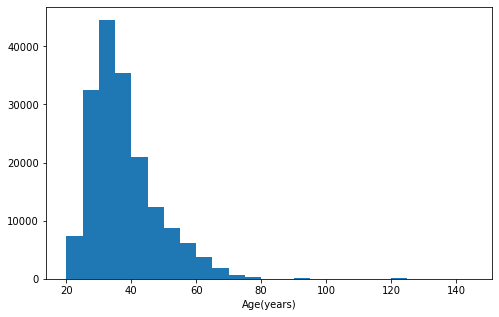

In [25]:
# distribution plot for the age
histplot(x='age', binsize=5, x_start=20, label='Age(years)')

Age is right skewed with a sign of outliers. The start member age is 20years with an outraging age above 140 years.

To clearly see the outliers I will plot age using boxplot.

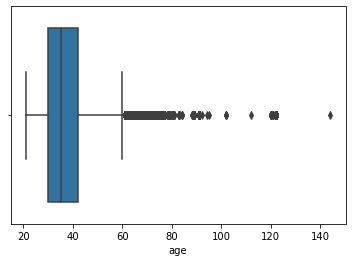

In [26]:
#ploting age on a boxplot
#to view outliers
sns.boxplot(x = 'age', data = bike);

According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_American_supercentenarians#:~:text=As%20of%209%20August%202022,aged%20115%20years%2C%20158%20days.) the oldest man in San Francisco is 115. Using that as a threshold for the maximum age considering any one older than 100 riding bicycle.

In [27]:
#data of where age > 115
max_age = 100
bike.query('age > @max_age')

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,hour,day_period,age,duration
1285,Shattuck Ave at Telegraph Ave,Shattuck Ave at 55th St,5391,Subscriber,Male,Yes,19,Evening,122.0,2.466667
10827,Bryant St at 2nd St,Grove St at Masonic Ave,6249,Subscriber,Male,No,19,Evening,122.0,21.916667
16087,Grove St at Masonic Ave,Folsom St at 3rd St,4968,Subscriber,Male,No,8,Morning,122.0,18.850000
17981,2nd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),5226,Subscriber,Male,No,19,Evening,102.0,6.100000
18885,Montgomery St BART Station (Market St at 2nd St),2nd St at Townsend St,5319,Subscriber,Male,No,17,Evening,102.0,7.200000
...,...,...,...,...,...,...,...,...,...,...
171996,2nd St at Folsom St,Grove St at Masonic Ave,4988,Subscriber,Male,No,17,Evening,122.0,22.800000
173711,Grove St at Masonic Ave,Folsom St at 3rd St,5445,Subscriber,Male,No,9,Morning,122.0,16.550000
177708,Bryant St at 2nd St,Grove St at Masonic Ave,5286,Subscriber,Male,No,19,Evening,122.0,25.450000
177885,Howard St at 2nd St,San Francisco Caltrain (Townsend St at 4th St),2175,Subscriber,Female,No,18,Evening,120.0,8.616667


There are 71 of these outliers record and due to lack of information to support the cause they will be dropped going on.

In [28]:
drop_index = bike.query('age > @max_age').index
bike = bike.query('index not in @drop_index')

Let replot the data

In [29]:
#the minimum and maximum age
print(bike.age.min())
print(bike.age.max())

21.0
95.0


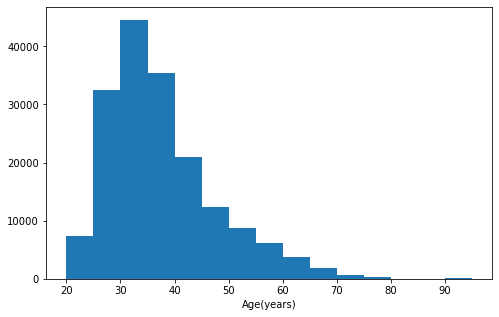

In [30]:
#new age distribution
histplot(x='age', binsize=5, x_start=20, label='Age(years)')

In [31]:
bike.age.describe()

count    174877.00000
mean         37.16093
std           9.97047
min          21.00000
25%          30.00000
50%          35.00000
75%          42.00000
max          95.00000
Name: age, dtype: float64

Majority of the member are within the age of 25 and 40. The lowest age is 21, highest is 95 and the average age is 35years.

## Gender

In [32]:
bike.member_gender.value_counts(normalize = True)*100

Male      74.589569
Female    23.325537
Other      2.084894
Name: member_gender, dtype: float64

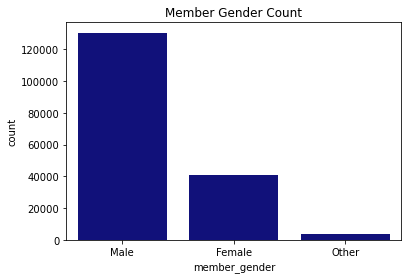

In [33]:
countplot(x='member_gender', order=['Male', 'Female', 'Other'], 
         title='Member Gender Count')

There are 3 categories of the members gender; Male, Female and Others. The Male Gender dominate the membership, followed by the Female gender and lastly the Others. More than 70% of the Members are Male.

## User Type

In [34]:
#unique types of subscriber
bike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

Using a Pie chart to display the portion of the Users

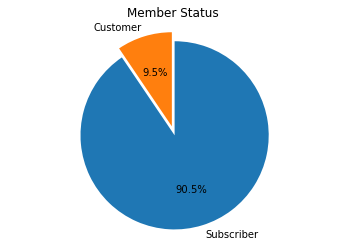

In [35]:
# pie chart
sorted_counts = bike.user_type.value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, 
        startangle = 90, counterclock = False, autopct='%1.1f%%', explode = (0.1,0));
plt.axis('equal')
plt.title('Member Status ');

There are 2 categories of members; Customer and Subscriber. 90.5% of the Members are Subscribers and the 9.5% are Customers

Moving on to Exploring the Station Info

## Station

### Most Common Station

In [36]:
#number of unique start station
bike.start_station_name.nunique()

329

In [37]:
#number of unique end station
bike.end_station_name.nunique()

329

In [38]:
#top start and end stations
top_start = bike.start_station_name.value_counts()[:10]
top_end = bike.end_station_name.value_counts()[:10]

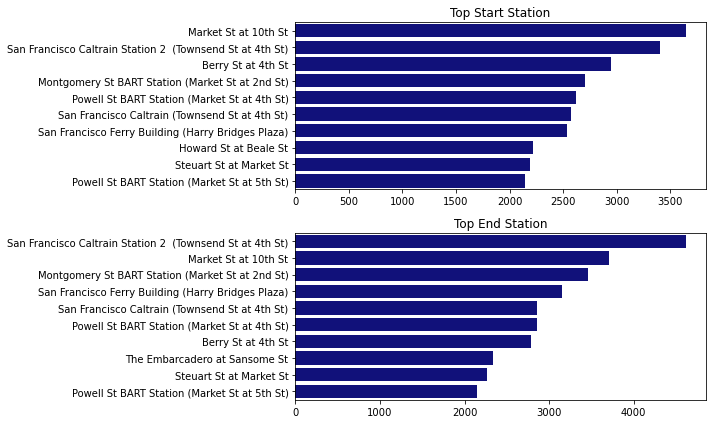

In [39]:
#plotting the top 10 start and end
fig, ax = plt.subplots(nrows=2, figsize = [10,6])

#bars
sns.barplot(y = top_start.index, x = top_start.values, color='darkblue', ax=ax[0])
sns.barplot(y = top_end.index, x = top_end.values, color='darkblue', ax=ax[1]);

#subplots title
ax[0].title.set_text('Top Start Station')
ax[1].title.set_text('Top End Station')

#even the spaces between subplots
fig.tight_layout()

There are 329 unique Start and End stations in the dataset. `Market St at 10th St`, `San Francisco Caltrain Station 2(Townsend St at 4th St)`, `Berry St at 4th St`, `Montgomery St BART Station(Market St at 2nd St)` are the most common Start and End Stations for the members trip within the city.

Finaling for the Univariate analysis, exploring the trip information individually available

## Trip Period

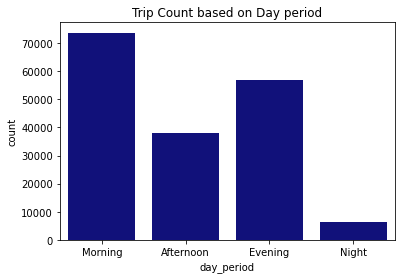

In [40]:
#day period count
day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
countplot(x='day_period', order=day_order, 
         title='Trip Count based on Day period')

Most trip are taken in the Morning, followed by Evening and less at Night. This is quite reasonable.
On a deeper look, let check specific hour in the Morning and Evening the trip spike.

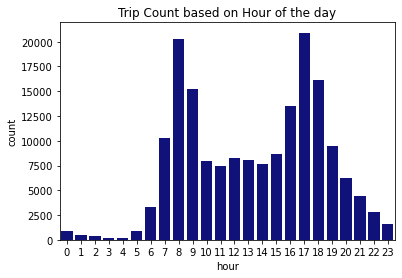

In [41]:
#hour count for trips
countplot(x='hour', order=None, 
         title='Trip Count based on Hour of the day')

Specifically, between 7AM and 9AM in the Morning, and between 4PM and 6PM in the Evening exist the highest trip. This period happen to be the resumption hour and closing hour respectively in the city which contribute to the increase in trip usage. Trips count between 10AM and 3PM, which fall within office hour, are relatively constant. The trip count then drop from 7PM till 6AM.

## Trip Duration

In [42]:
#stats description
bike.duration.describe()

count    174877.000000
mean         11.733767
std          27.375477
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration, dtype: float64

Average Trip duration is 9Mins

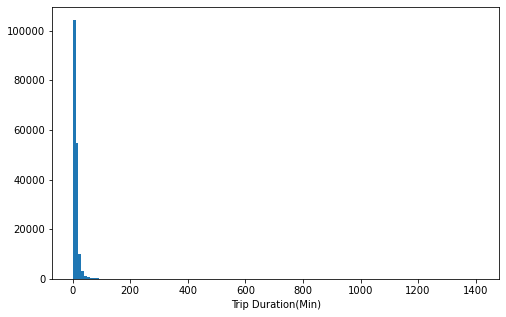

In [43]:
#trip duration distribution
histplot(x='duration', binsize=10, label='Trip Duration(Min)')

The distribution of the duration is highly right skewed.

Let plot the log transformation with a log scale.

In [44]:
#log transformation
np.log10(bike.duration).describe()

count    174877.000000
mean          0.929677
std           0.305180
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration, dtype: float64

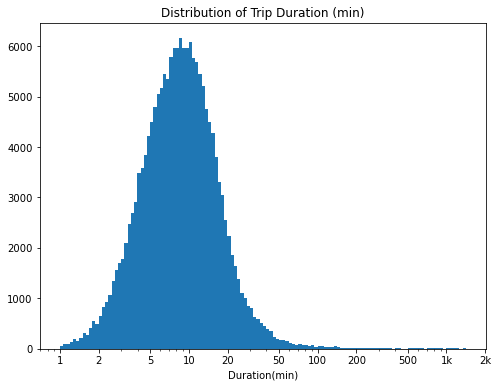

In [45]:
#log distribution
binsize=0.025
bin_edges=10 ** np.arange(0, np.log10(bike.duration.max())+binsize, binsize)
plt.figure(figsize=[8,6])

plt.hist(data=bike, x='duration', bins=bin_edges)
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100,200,500,1000,2000],[1,2,5,10,20,50,100,200,500,'1k','2k'])
plt.xlabel('Duration(min)')
plt.title('Distribution of Trip Duration (min)');

On a closer look putting the max to 100 minutes

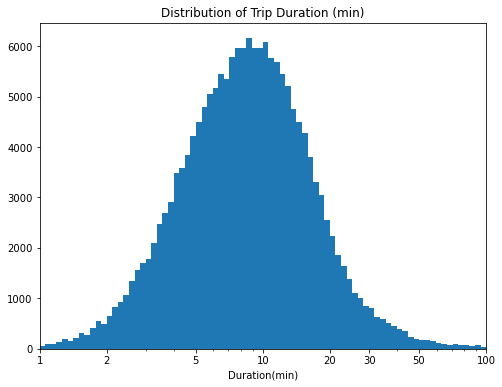

In [46]:
#log distribution
binsize=0.025
bin_edges=10 ** np.arange(0, np.log10(bike.duration.max())+binsize, binsize)
plt.figure(figsize=[8,6])

plt.hist(data=bike, x='duration', bins=bin_edges)
plt.xscale('log')
plt.xticks([1,2,5,10,20,30,50,100,200,500,1000,2000],[1,2,5,10,20,30,50,100,200,500,'1k','2k'])
plt.xlabel('Duration(min)')
plt.xlim((1,100))
plt.title('Distribution of Trip Duration (min)');

Using the log scale the duration distribution becomes relatively a normal distribution. Majority of the trips are between 5 to 25mins, fairly a short trips. The average trip is 9mins.
From the normal distribution it can be concluded that 90% of the trip duration is less than 30minutes

## Share Trip

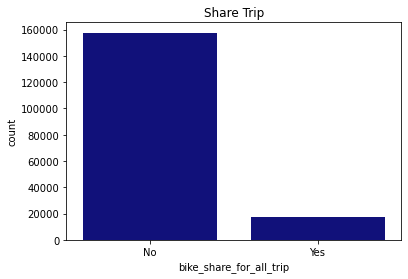

In [47]:
#bike_share trip
countplot(x='bike_share_for_all_trip', order=None, 
         title='Share Trip')

In [48]:
bike.bike_share_for_all_trip.value_counts(normalize=True)

No     0.900965
Yes    0.099035
Name: bike_share_for_all_trip, dtype: float64

Majority of the member do not share bike for trip. Only few, about 10%, prefer to share bikes for trip

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> `Age` : The age distribution is right skewed and has outliers. Some members age was high over 140years. After some considerations the outliers was dropped using the limit threshold at 100 years as a logical conclusion. About 71 rows were dropped. After the transformation the average age of the member was 35years, the minimum was 21years and the maximum 95 years.

> `Trip Period`: There was an expected rise in count of trip before office and after office hour, 7AM to 9AM and 4PM to 6PM, respectively. On a broader view there are more bike usage in the Morning and Evening compared to Afternoon and Night.

> `Trip Duration`: The trip duration was highly skewed to the right. At a glance had no visible trend, after plotting on a log scale the distribution showed a normal distribution. It still displayed to be highly right skewed and strong ouliers. The plot was set to an upper bound of 100. The final distribution showed an average of 9MINS was spent for each trip and 90% of the trips had a duration less than 30Mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age distribution was highly right skewed but after dropping the outliers using logical decisions, by using 100YEARS as the threshold, the distribution improved to be fairly skewed.

> The duration showed no sign of normal distribution not until after log transformation and setting the x-axis upper bound limit to 100Mins, then appeared the normal distribution. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Pairwise Correlations

Let look at a pairwise correlations present between the numerical features in the data

In [49]:
#the numerical features
bike.corr().columns

Index(['hour', 'age', 'duration'], dtype='object')

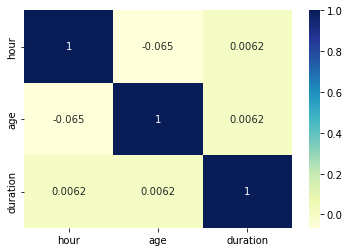

In [50]:
num_corr = bike.corr()

#correlation plot
sns.heatmap(num_corr, annot=True, cmap='YlGnBu');

It is observed from the correlation between `duration` and `age` is close to 0, impling that there is no linear relationship between them. `Age` and `hour` shows a weak negative correlation.

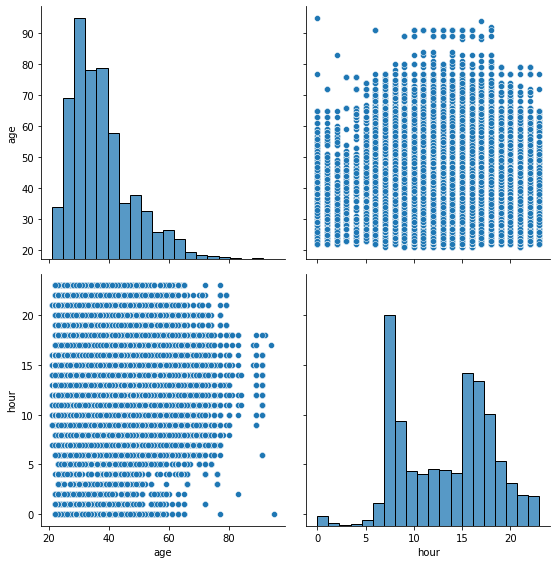

In [51]:
gr = sns.PairGrid(vars=['age', 'hour'], data=bike, height=4)
gr.map_offdiag(sns.scatterplot)
gr.map_diag(sns.histplot, bins=20);

This shows no clear relationship betwee `age` and `hour`. This further validate the claim from the correlation value close to 0.

### Member Info and Trip Info

<Figure size 720x720 with 0 Axes>

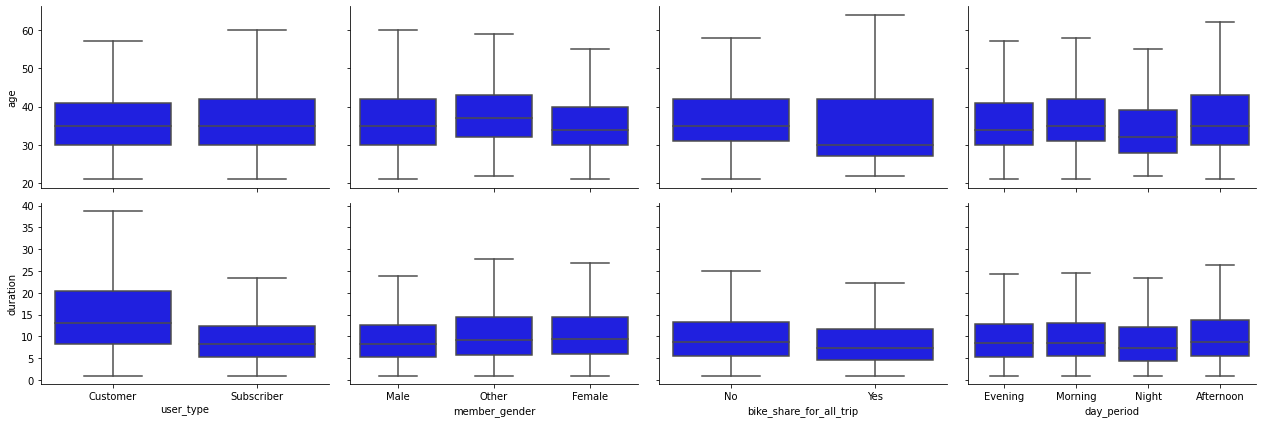

In [52]:
#function to call boxplot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, color='blue', showfliers=False);
    #showfliers = False to drop outliers

    
#plot pairgrid
plt.figure(figsize=[10,10])
cat_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'day_period']
g = sns.PairGrid(data=bike, x_vars=cat_vars, y_vars=['age', 'duration'], height=3, aspect=1.5)
g.map(boxplot);

* The average duration for subscriber is lower than that of customers and 75% of the subscriber duration is lower than the average duration for customers.
* The female gender and other spend a little more time than the male which is quite expected. And the average age for the other gender is higher than the male and female with female having  the lowest.

* Customers that do not share bike for trips spend have higher duration and the average age is higher compared to those that share

* Average duration is relatively the same in the evening and morning, but higher in the afternoon and lowest at night. This is quite expected trend.

* The average age of customers that use the bike in the afternoon is high in the morning and low in the night. The evening and afternoon remained fairly the same.

### Total Duration From Start or End Station

In [53]:
start_stat_dur = bike.groupby('start_station_name').duration.sum().sort_values(ascending=False).reset_index()[:10]
end_stat_dur = bike.groupby('end_station_name').duration.sum().sort_values(ascending=False).reset_index()[:10]

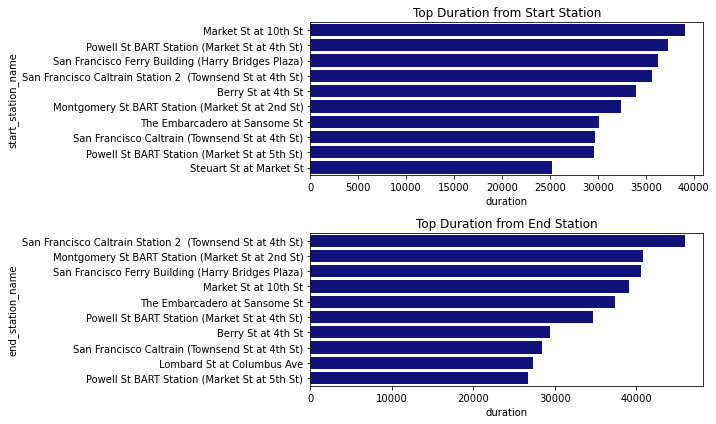

In [54]:
#plotting the top 10 start and end
fig, ax = plt.subplots(nrows=2, figsize = [10,6])

#bars
sns.barplot(y = start_stat_dur.start_station_name, x = start_stat_dur.duration, color='darkblue', ax=ax[0])
sns.barplot(y = end_stat_dur.end_station_name, x = end_stat_dur.duration, color='darkblue', ax=ax[1]);

#subplots title
ax[0].title.set_text('Top Duration from Start Station')
ax[1].title.set_text('Top Duration from End Station')

#even the spaces between subplots
fig.tight_layout()

As expected, some of the top start duration are still topping in total duration covered for the period. `Market St at 10th St`, `San Francisco Caltrain Station 2(Townsend St at 4th St)`, `Berry St at 4th St`, `Montgomery St BART Station(Market St at 2nd St)` are example.

### Member Info and Day Period

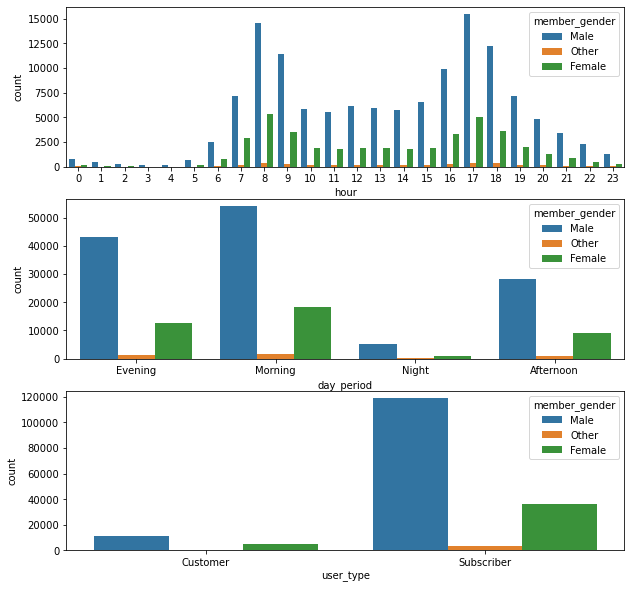

In [55]:
#gneder and day info 
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.countplot(data=bike, x='hour', hue='member_gender', ax=ax[0])
sns.countplot(data=bike, x='day_period', hue='member_gender', ax=ax[1])
sns.countplot(data=bike, x='user_type', hue='member_gender', ax=ax[2]);

Using raw figures to support the chart

In [56]:
#to confirm if the other is totally empty in the customer user_type
bike.groupby('user_type').member_gender.value_counts(normalize=True)

user_type   member_gender
Customer    Male             0.693738
            Female           0.279089
            Other            0.027172
Subscriber  Male             0.751352
            Female           0.228461
            Other            0.020187
Name: member_gender, dtype: float64

* 8am and 5am records the highest Male and Female. The Male are the highest user for all the hour of the day

* All gender experince the highest users in the morning followed by Evening
* The Male are the majority for all type of users
* The Other gender is close to 0% in both user type

In [57]:
bike.columns

Index(['start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'hour', 'day_period', 'age',
       'duration'],
      dtype='object')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
* It was confirmed that `Age` and `Hour` have no linear relationship, supported by a correlation value close to 0
* Average duration is relatively same in the evening and morning, but higher in the afternoon and lowest at night. This is quite understandable
* The average age of customers drops from Morning to Night. Thus imples that younger customers tend to use the bike more in the night compared to the older customers
* Some of the top start and end stations still maintained their position as top in overall duration used for the period
* 8AM and 5PM hour have the highest period for both Male and Female customers
* The percentage of the others per user_type is negligible, close to 0.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* It was surprising to discover that the Female gender spend more time on bike than the male, this may mean that they ride slower or the embark on longer distance than the male.

* Further analysis, provided there is more female and Other data, to see the relations between the Male and Female along with Other.

## Multivariate Exploration

Looking at some categorical features along with the trip duration

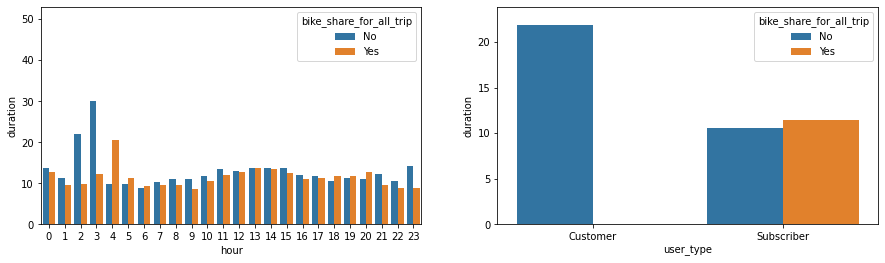

In [58]:
# categorical features with trip duration using user_type as hue
fig, ax = plt.subplots(ncols=2, figsize=[15,4])
sns.barplot(data=bike, x='hour', y='duration', hue='bike_share_for_all_trip', errwidth=0, ax=ax[0])
sns.barplot(data=bike, x='user_type', y='duration', hue='bike_share_for_all_trip', errwidth=0, ax=ax[1]);

In the early hours 0, 1, 2, 3 and 23 the average bike duration is high for customers not sharing bikes. At 4hours the chart shows the highest duration for customers sharing bike.

Majority of the Customer user_type do not share bike for all trips compared to the Subscriber User type and they spend more time on trip.

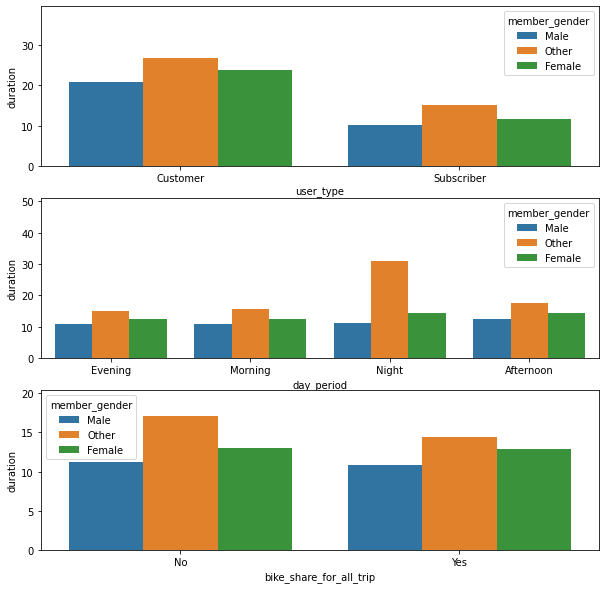

In [59]:
# categorical features with trip duration using user_type as hue
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=bike, x='user_type', y='duration', hue='member_gender', errwidth=0, ax=ax[0])
sns.barplot(data=bike, x='day_period', y='duration', hue='member_gender', errwidth=0, ax=ax[1])
sns.barplot(data=bike, x='bike_share_for_all_trip', y='duration', hue='member_gender', errwidth=0, ax=ax[2]);

Generally, the average duration of User type Customer is higher than the duration of Subscribers. The Other gender appeared to use higher duration both as Customers or as Subcribers, and the Female gender having the lowest bike usage duration. This further buttress the claims above in the Bivariate.

The average duration of Male and Female gender is fairly constant across all day period. The Other Gender has the highest duration at Night. At all period of the day the Male Gender used the lowest duration for trips.

The duration for all customers who did not share bike for all trips is relatively higher than those who did.

### Duration, Age and Gender 

Let look at the relationship between Duration, Age and Gender

In [60]:
#the histogram function
def histogram(x, y, **kwargs):
    plt.hist2d(x, y, cmin=0.5)

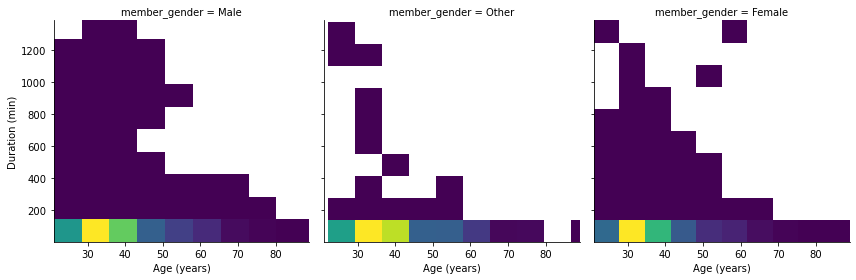

In [61]:
#gender, age and duration relationship
g = sns.FacetGrid(data = bike, col = 'member_gender', height=4)
g.map(histogram, 'age', 'duration', color='inferno_r')
g.set_xlabels('Age (years)')
g.set_ylabels('Duration (min)')
plt.show();

The chart above is hard to interpret, let use a log transform of duration

In [62]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    

    
bike['log_duration'] = bike['duration'].apply(log_trans)

In [63]:
#log enabled histogram
def histogram(x, y, **kwargs):
    palette=kwargs.pop('color')
    bins_x =np.arange(18, bike.age.max()+2, 2)
    bins_y =np.arange(0, 2+0.1, 0.1)
    plt.hist2d(x, y, bins=[bins_x,bins_y], cmap=palette, cmin=0.5)
    plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100])

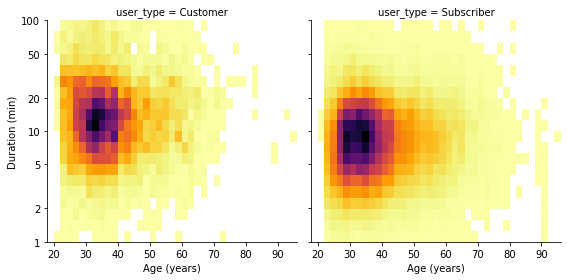

In [64]:
g = sns.FacetGrid(data = bike, col = 'user_type', size=4)
g.map(histogram, 'age', 'log_duration', color='inferno_r')
g.set_xlabels('Age (years)')
g.set_ylabels('Duration (min)');

Above it shows a wider and longer cluster in the subscribers meaning more older people are subscribers and shorter cluster height implicating shorter bike duration.
On the other hand is the Customer having a narrow, short lenght and  taller height cluster, this means that the the customers are younger people and take longer duration trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate analysis showed and emphasised more on the claims from the bivariate as well as the univariate analysis. 

Generally, the average duration of User type Customer is higher than the duration of Subscribers. The Other gender appeared to use higher duration both as Customers or as Subcribers, and the Male gender having the lowest bike usage duration. This further buttress the claims above in the Bivariate.

The analysis showed that the average age of the customers is lower than the subscribers, impling that the subscribers are older people and the spend lower duration on trips.

### Were there any interesting or surprising interactions between features?
There was no surprising interactions, the multivariate only complimented the claims from above. The usually relationships between the categorical and numerical features continued.

## Conclusions
> The member info contributed more to the bike usage as expected. 

* Most of the users are within the age of `25` and `40`
* The users base is dominated by the `Male` Gender with over `70%`
* The users categories; `Subscriber` and `Customers`, is also dominated by the Subscribers with over `90%` of them
* The analysis showed top starting and ending station with `Market St at 10th St` and `San Francisco Caltrain Station 2(Townsend St at 4th St)` leading in both and respectively.
* Most trips are taken in the morning and in the evening, further anaysis showed that the trip spike between the hour of `7` and `9` in the morning and `4PM` and `6PM` in the evening
* Majority of the trips are between `5 - 25minutes` duration, using the normal distribution `90%` of the trip duration are less than `30minutes`
* Only `10%` of the users prefer to share bike for all trips
* It was also observed that `duration` and `age` have no linear relationship or correlation
* The average `duration` for the `subscribers` is lower than that of the `customers`. 
* The `female` gender trip `duration` is higher, this is could mean they ride slower or embark on longer trip compared to the `Male` gender.
* The average `age` for the other gender is the highest and that of the `Female` is the lowest.
* Customers that do not share bike for trips spend have higher duration and the average age is higher compared to those that share
* `8am` and `5am` records the highest `Male` and `Female`. The `Male` are the highest user for all the hour of the day
* All gender experince the highest users in the `Morning` followed by `Evening`.
* The average age of customers drops from `Morning` to `Night`. Thus imples that younger customers tend to use the bike more in the night compared to the older customers
* The analysis also showed that the average `age` of the `customers` is lower than the `subscribers`, impling that the subscribers are older people and they spend lower duration on trips.



> To achieve this the given dataset was wrangled, some of the steps taken are:
* Extracted hour and day period from the start time
* Extracted user age
* converted the duration to minutes
* some columns not needed were dropped
* some high outliers were dropped